In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(10)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

In [61]:
def load_data(string,path='../Datasets for Mid Sem Presentation/'):
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    return X,y
        
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(1+truth))


def cost_function(pred,truth):
    return np.mean(abs(pred-truth))


def abs_error(pred,truth):
    return np.mean(np.abs(pred-truth))

In [44]:
test_x,test_y = load_data('test_data')
train_x,train_y = load_data("train_data_2")
v_x,v_y = load_data("val_data_2")

In [45]:
print (len(v_x))

27


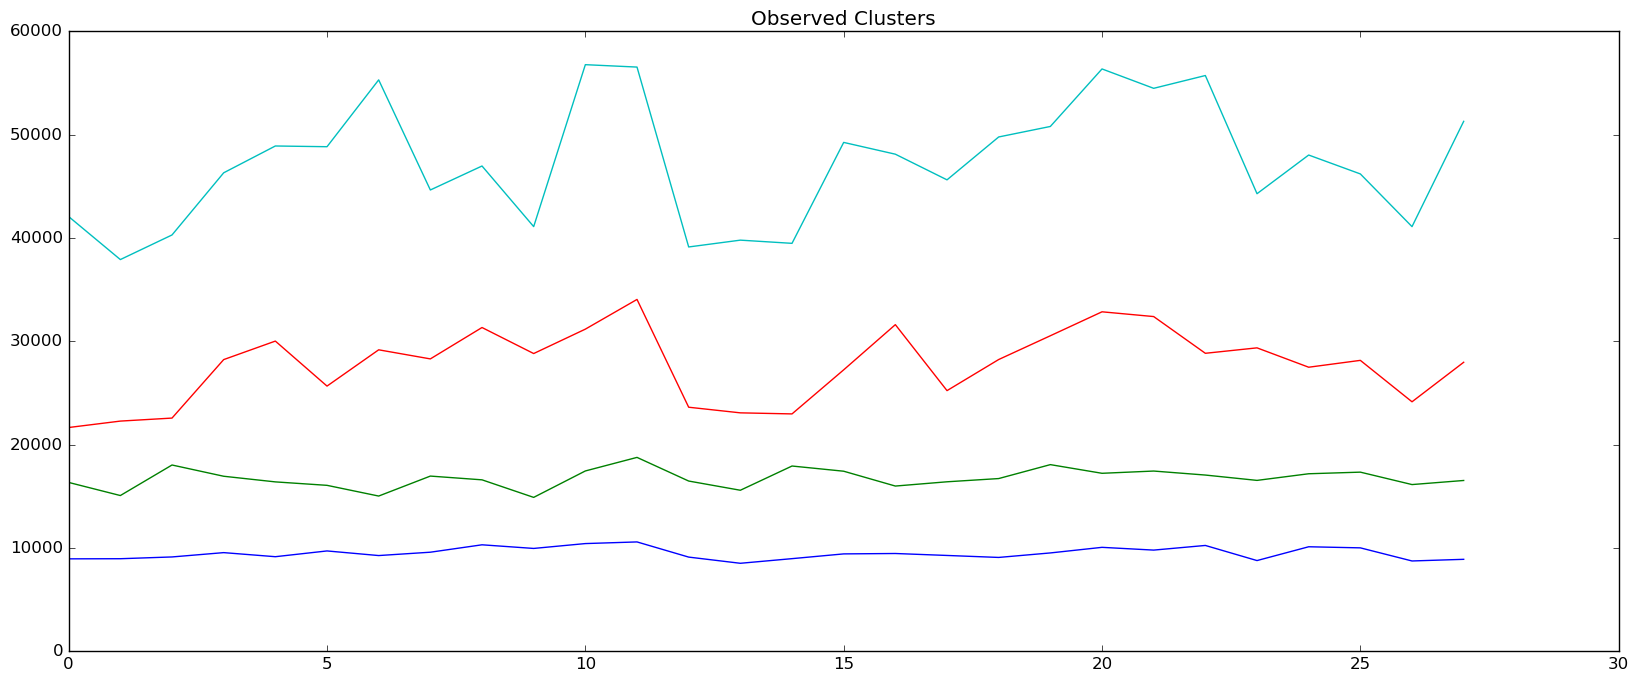

In [46]:
plt.close('all')

plt.figure(figsize=(20,8))
plt.title("Observed Clusters")
kmeans.cluster_centers_.sort(axis=0)
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(28),i)
plt.show()




In [47]:
Counter(kmeans.predict(train_x))

Counter({0: 38, 1: 30, 2: 13, 3: 5})

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_x)
kmeans.cluster_centers_.sort(axis=0)

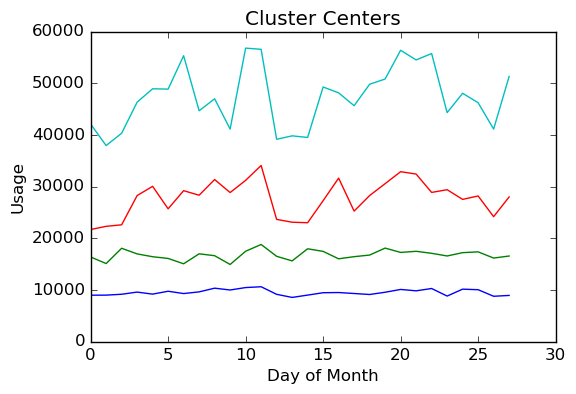

In [50]:
plt.close('all')
plt.figure()
kmeans.cluster_centers_.sort(axis=0)
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(28),i)
    
plt.title('Cluster Centers')#,color='white')
#plt.xticks(color='white')
#plt.yticks(color='white')
plt.xlabel("Day of Month")#,color='white')
plt.ylabel("Usage")#,color='white')
plt.rcParams.update({'font.size': 12})
plt.show()




In [51]:
val = min(Counter(kmeans.predict(train_x)).values())

In [52]:
val

5

In [53]:

def return_prediction(X,y,model_array,kmeans):

    preds = []
    models = model_array+[]
    centroids = kmeans.predict(X)
    for i in range(len(X)):
        centroid = centroids[i]
        model = models[centroid]
        val = model.predict([X[i]])
        preds.append(val)


    preds = np.array(preds).reshape(y.shape)
    return preds


In [54]:
models=[]

for i in range(kmeans.n_clusters):
    centroids = kmeans.predict(train_x)
    indices = np.where(centroids==i,True,False)
    data_x = train_x[indices]
    data_y = train_y[indices]
    model = LinearRegression()
    model.fit(data_x,data_y)
    models.append(model)
    model=None
    print (data_x.shape)
    
    
centers_1 = kmeans.cluster_centers_
trainx_clusters = kmeans.predict(train_x)
testx_clusters = kmeans.predict(test_x)

(38, 28)
(30, 28)
(13, 28)
(5, 28)


In [55]:
models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False)]

In [56]:
test_centroids = kmeans.predict(test_x)
train_centroids = kmeans.predict(train_x)

In [57]:

kmeans.cluster_centers_.sort(axis=0)
preds_train = return_prediction(train_x,train_y,models,kmeans)
preds_test = return_prediction(test_x,test_y,models,kmeans)
preds_val = return_prediction(v_x,v_y,models,kmeans)

In [58]:
train_cost = relative_cost(train_y,preds_train)
v_cost = relative_cost(v_y,preds_val)
test_cost = relative_cost(test_y,preds_test)

In [60]:
train_cost,test_cost,v_cost

(0.24515842, 2.614213, 2.7943547)

In [65]:
train_cost = abs_error(train_y,preds_train)
v_cost = abs_error(v_y,preds_val)
test_cost = abs_error(test_y,preds_test)

In [66]:
train_cost,test_cost,v_cost

(62.322712, 963.4554, 967.223)

In [63]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_y)

In [64]:
vals = kmeans.cluster_centers_

In [65]:
centers_2 = kmeans.cluster_centers_
trainy_clusters = kmeans.predict(train_y)
testy_clusters = kmeans.predict(test_y)

In [66]:
Counter(kmeans.predict(test_y))

Counter({0: 6, 1: 2, 2: 2, 3: 15})

In [67]:
Counter(kmeans.predict(train_y))

Counter({0: 30, 1: 9, 2: 11, 3: 54})

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
#np.divide(confusion_matrix(trainx_clusters,trainy_clusters)*1.0,confusion_matrix(trainx_clusters,trainy_clusters).sum(axis=1).reshape((4,1)))


In [70]:
confusion_matrix(testx_clusters,testy_clusters)

array([[ 0,  0,  0, 13],
       [ 4,  0,  0,  2],
       [ 2,  0,  2,  0],
       [ 0,  2,  0,  0]])

In [71]:
train_x.shape

(104, 30)

In [72]:
78.0/104

0.75

In [73]:
test_x.shape

(25, 30)

In [74]:
import itertools
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_y)
perm_list = list(itertools.permutations(kmeans.cluster_centers_))
cnt=0

max_i = 0
prev_score = 0

for i in perm_list:
    
    kmeans.cluster_centers_ = np.array(i)
    trainy_clusters = kmeans.predict(train_y)
    testy_clusters = kmeans.predict(test_y)
    curr_score = np.trace(confusion_matrix(train_centroids,trainy_clusters))
    if curr_score>prev_score:
        max_i = cnt
        prev_score = max(curr_score,prev_score)
        req_centroids = i
    print (curr_score,cnt)
    cnt+=1

(11, 0)
(0, 1)
(0, 2)
(9, 3)
(19, 4)
(39, 5)
(34, 6)
(23, 7)
(7, 8)
(0, 9)
(26, 10)
(30, 11)
(23, 12)
(32, 13)
(7, 14)
(0, 15)
(35, 16)
(19, 17)
(58, 18)
(78, 19)
(42, 20)
(46, 21)
(51, 22)
(35, 23)


In [75]:
max_i

19

In [76]:
kmeans.cluster_centers_ = np.array(req_centroids)
testy_clusters = kmeans.predict(test_y)
curr_score = np.trace(confusion_matrix(test_centroids,testy_clusters))

In [77]:
confusion_matrix(test_centroids,testy_clusters)

array([[13,  0,  0,  0],
       [ 2,  4,  0,  0],
       [ 0,  2,  2,  0],
       [ 0,  0,  0,  2]])

In [78]:
kmeans.cluster_centers_.sort(axis=1)
testy_clusters = kmeans.predict(test_y)
curr_score = np.trace(confusion_matrix(test_centroids,testy_clusters))

In [79]:
confusion_matrix(test_centroids,testy_clusters)

array([[13,  0,  0,  0],
       [ 3,  3,  0,  0],
       [ 0,  4,  0,  0],
       [ 0,  0,  1,  1]])

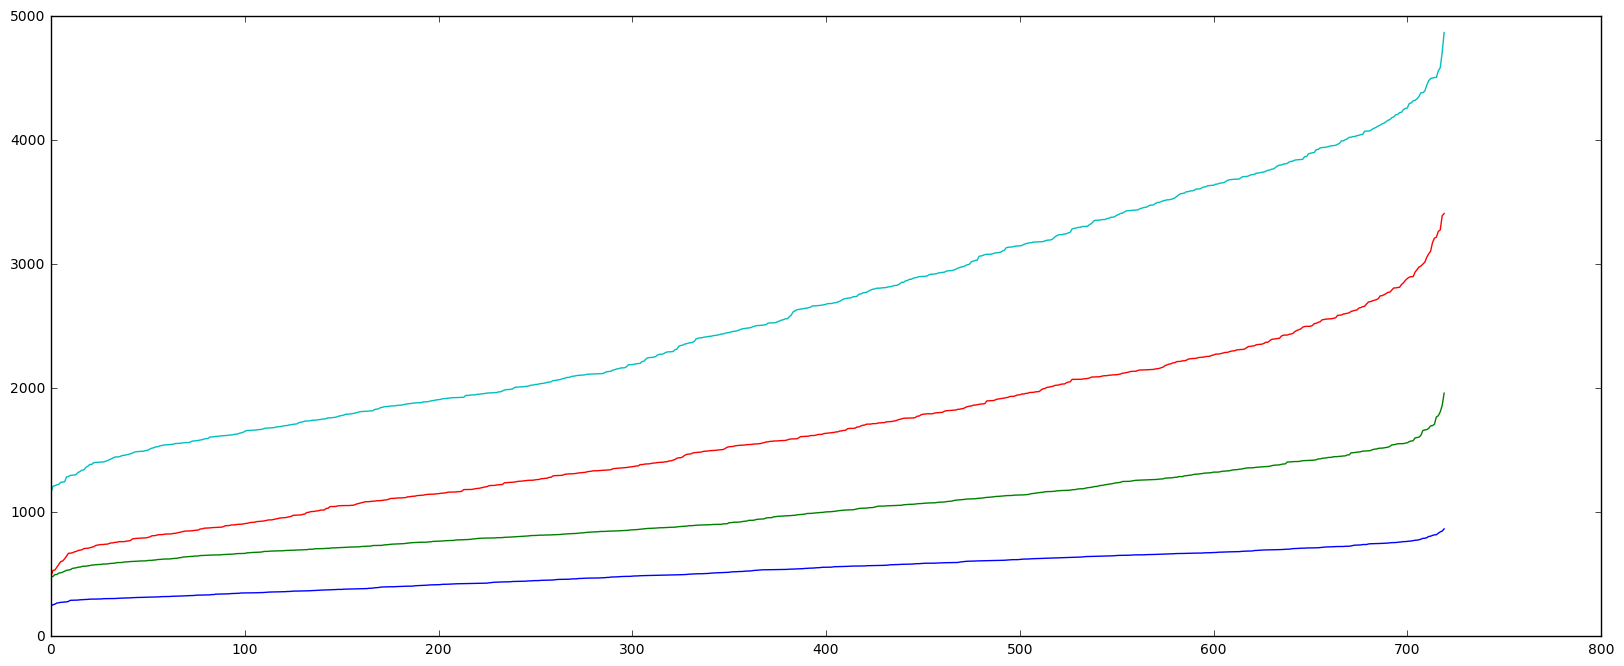

In [80]:
plt.close('all')
plt.figure(figsize=(20,8))
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(720),i)
plt.show()